<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))
dfCovidtracking.set_index(['date'], inplace=True)


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-26-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
print("US Summary")
dfCovidtracking.groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']]

US Summary


,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-24,1635760,91941,20806.0,654.0
2020-05-25,1654829,92464,19069.0,523.0
2020-05-26,1671035,93093,16206.0,629.0


In [7]:
dfCovidtracking.loc[dfCovidtracking.state=='CA'].groupby(by='date').sum()[-3:][['positive', 'death', 'positiveIncrease', 'deathIncrease']].head(5)

,positive,death,positiveIncrease,deathIncrease
date,,,,
2020-05-24,92710,3774,2079.0,66.0
2020-05-25,94558,3795,1848.0,21.0
2020-05-26,96733,3814,2175.0,19.0


In [8]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.index.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1671035
Total deaths = 93093


,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
NY,363836,1410292,0,4265.0,77637.0,1273.0,0.0,1002.0,0.0,64443.0,A,5/26/2020 00:00,8aea51ece90604111c8a92b2fe633aae06e6a4b5,2020-05-26T20:00:00Z,23564,77637.0,1774128,1774128,1774128,36,76.0,112.0,33607.0,1072.0,34679.0
NJ,155764,480128,0,2723.0,16373.0,786.0,0.0,578.0,0.0,25384.0,A+,5/26/2020 13:00,ea17a949009b2fa3975a4aff06e196bb5ff02c61,2020-05-26T20:00:00Z,11191,16373.0,635892,635892,635892,34,47.0,16373.0,11423.0,672.0,12095.0
IL,113195,673599,0,3788.0,0.0,1035.0,0.0,590.0,0.0,0.0,A,5/26/2020 00:00,e7ba505f3fe73b7424d1668ac6e1537c5bb169fe,2020-05-26T20:00:00Z,4923,0.0,786794,786794,786794,17,39.0,0.0,16052.0,1178.0,17230.0
CA,96733,1599663,0,4404.0,0.0,1392.0,0.0,0.0,0.0,0.0,B,5/26/2020 00:00,c10019a47267304cfdeb7b73c433186046e6dd1f,2020-05-26T20:00:00Z,3814,0.0,1696396,1696396,1696396,06,19.0,0.0,50119.0,2175.0,52294.0
MA,93693,451788,0,2108.0,9388.0,560.0,0.0,0.0,0.0,0.0,A,5/26/2020 10:00,bceb8b156427d676b1127aa532e8ce4336967491,2020-05-26T20:00:00Z,6473,9388.0,545481,545481,545481,25,57.0,49.0,4498.0,422.0,4920.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [10]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
119,2020-05-20,1542594,12608216,87472,21342.0,1402.0,0.923137
120,2020-05-21,1568497,13024762,88916,25903.0,1444.0,0.938638
121,2020-05-22,1592656,13419058,90196,24159.0,1280.0,0.953096
122,2020-05-23,1614954,13784786,91287,22298.0,1091.0,0.966439
123,2020-05-24,1635760,14163694,91941,20806.0,654.0,0.978890
124,2020-05-25,1654829,14604942,92464,19069.0,523.0,0.990302
125,2020-05-26,1671035,14907041,93093,16206.0,629.0,1.000000


In [11]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
77,2020-05-20,84057,1380120,3436,2262.0,102.0,0.868959
78,2020-05-21,86197,1421127,3542,2140.0,106.0,0.891082
79,2020-05-22,88444,1466773,3630,2247.0,88.0,0.914311
80,2020-05-23,90631,1515306,3708,2187.0,78.0,0.936919
81,2020-05-24,92710,1582745,3774,2079.0,66.0,0.958411
82,2020-05-25,94558,1644102,3795,1848.0,21.0,0.977515
83,2020-05-26,96733,1696396,3814,2175.0,19.0,1.000000


In [12]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-22,1592656,11826402,3709,38802.0,170697.0,9048.0,7689.0,4716.0,633.0,350135.0,90196,170697.0,13422767,13419058,13419058,1280.0,4443.0,370137.0,24159.0,394296.0
2020-05-23,1614954,12169832,4084,37873.0,172037.0,8812.0,7770.0,4620.0,638.0,361239.0,91287,172037.0,13788870,13784786,13784786,1091.0,1340.0,343430.0,22298.0,365728.0
2020-05-24,1635760,12527934,3860,36706.0,172574.0,8487.0,7801.0,4383.0,639.0,366736.0,91941,172574.0,14167554,14163694,14163694,654.0,537.0,358102.0,20806.0,378908.0
2020-05-25,1654829,12950113,3368,36668.0,173541.0,8472.0,7847.0,4237.0,642.0,379157.0,92464,173541.0,14608310,14604942,14604942,523.0,967.0,422179.0,19069.0,441248.0
2020-05-26,1671035,13236006,1549,36609.0,190823.0,8585.0,7899.0,4215.0,650.0,384902.0,93093,190823.0,14908590,14907041,14907041,629.0,17282.0,285893.0,16206.0,302099.0


In [13]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-22,88444,1378329,0,4762.0,0.0,1317.0,0.0,0.0,0.0,0.0,3630,0.0,1466773,1466773,1466773,88.0,0.0,43399.0,2247.0,45646.0
2020-05-23,90631,1424675,0,4342.0,0.0,1312.0,0.0,0.0,0.0,0.0,3708,0.0,1515306,1515306,1515306,78.0,0.0,46346.0,2187.0,48533.0
2020-05-24,92710,1490035,0,4300.0,0.0,1315.0,0.0,0.0,0.0,0.0,3774,0.0,1582745,1582745,1582745,66.0,0.0,65360.0,2079.0,67439.0
2020-05-25,94558,1549544,0,4306.0,0.0,1301.0,0.0,0.0,0.0,0.0,3795,0.0,1644102,1644102,1644102,21.0,0.0,59509.0,1848.0,61357.0
2020-05-26,96733,1599663,0,4404.0,0.0,1392.0,0.0,0.0,0.0,0.0,3814,0.0,1696396,1696396,1696396,19.0,0.0,50119.0,2175.0,52294.0


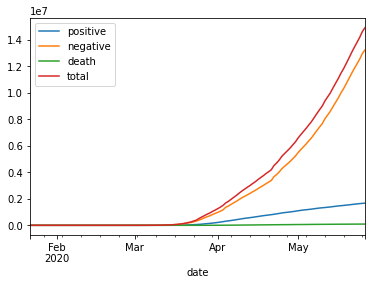

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

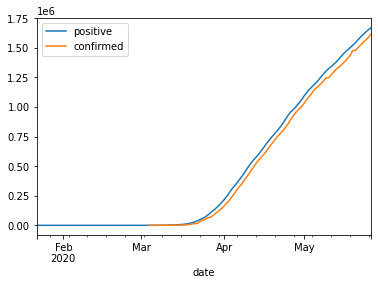

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1680913
dead           98913
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    99387
dead          3819
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1680913
Brazil             391222
Russia             362342
United Kingdom     266599
Spain              236259
Italy              230555
France             182847
Germany            181200
Turkey             158762
India              150793
Name: confirmed, dtype: int64

In [20]:
dfctd_state_curr.head()

,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,
AK,411,44553,0,12.0,0.0,0.0,0.0,0.0,0.0,362.0,C,5/26/2020 00:00,fcbd34ff6bfcac99304f454a7b90279f03e04f9e,2020-05-26T20:00:00Z,10,0.0,44964,44964,44964,02,0.0,0.0,490.0,2.0,492.0
AL,15396,178363,0,0.0,1671.0,0.0,551.0,0.0,327.0,7951.0,B,5/26/2020 00:00,1e5b99a08b1aee7651ff7e22ef5f59f6e520f490,2020-05-26T20:00:00Z,575,1671.0,193759,193759,193759,01,13.0,42.0,2778.0,666.0,3444.0
AR,6180,105593,0,107.0,617.0,0.0,0.0,18.0,114.0,4332.0,A,5/26/2020 15:29,0babe89e62d07070dae7aa9a81b624454faa0dfa,2020-05-26T20:00:00Z,119,617.0,111773,111773,111773,05,2.0,12.0,0.0,151.0,151.0
AS,0,124,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/19/2020 00:00,5fffca38aa0cc8ce98ed465e19d7391ab5a2efdd,2020-05-26T20:00:00Z,0,0.0,124,124,124,60,0.0,0.0,0.0,0.0,0.0
AZ,16783,173948,0,818.0,1988.0,336.0,0.0,208.0,0.0,4297.0,A+,5/25/2020 00:00,531b8893bc6a2a401f0bea90f7f135bf799eb893,2020-05-26T20:00:00Z,807,1988.0,190731,190731,190731,04,1.0,27.0,2727.0,222.0,2949.0


In [0]:
dfState = dfCovidtracking.reset_index()[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [23]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-26,52255,2338,52255,1.000000
FL,2020-05-25,51746,2331,52255,0.990259
FL,2020-05-24,50867,2316,52255,0.973438
FL,2020-05-23,50127,2312,52255,0.959277
FL,2020-05-22,49451,2268,52255,0.946340
FL,2020-05-21,48675,2222,52255,0.931490
FL,2020-05-20,47471,2173,52255,0.908449


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

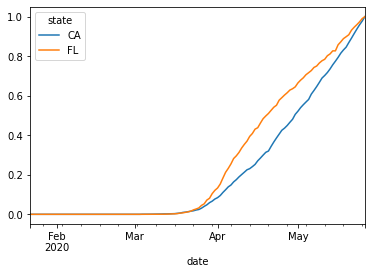

In [25]:
x = res.loc[:, ['CA','FL']].plot.line()

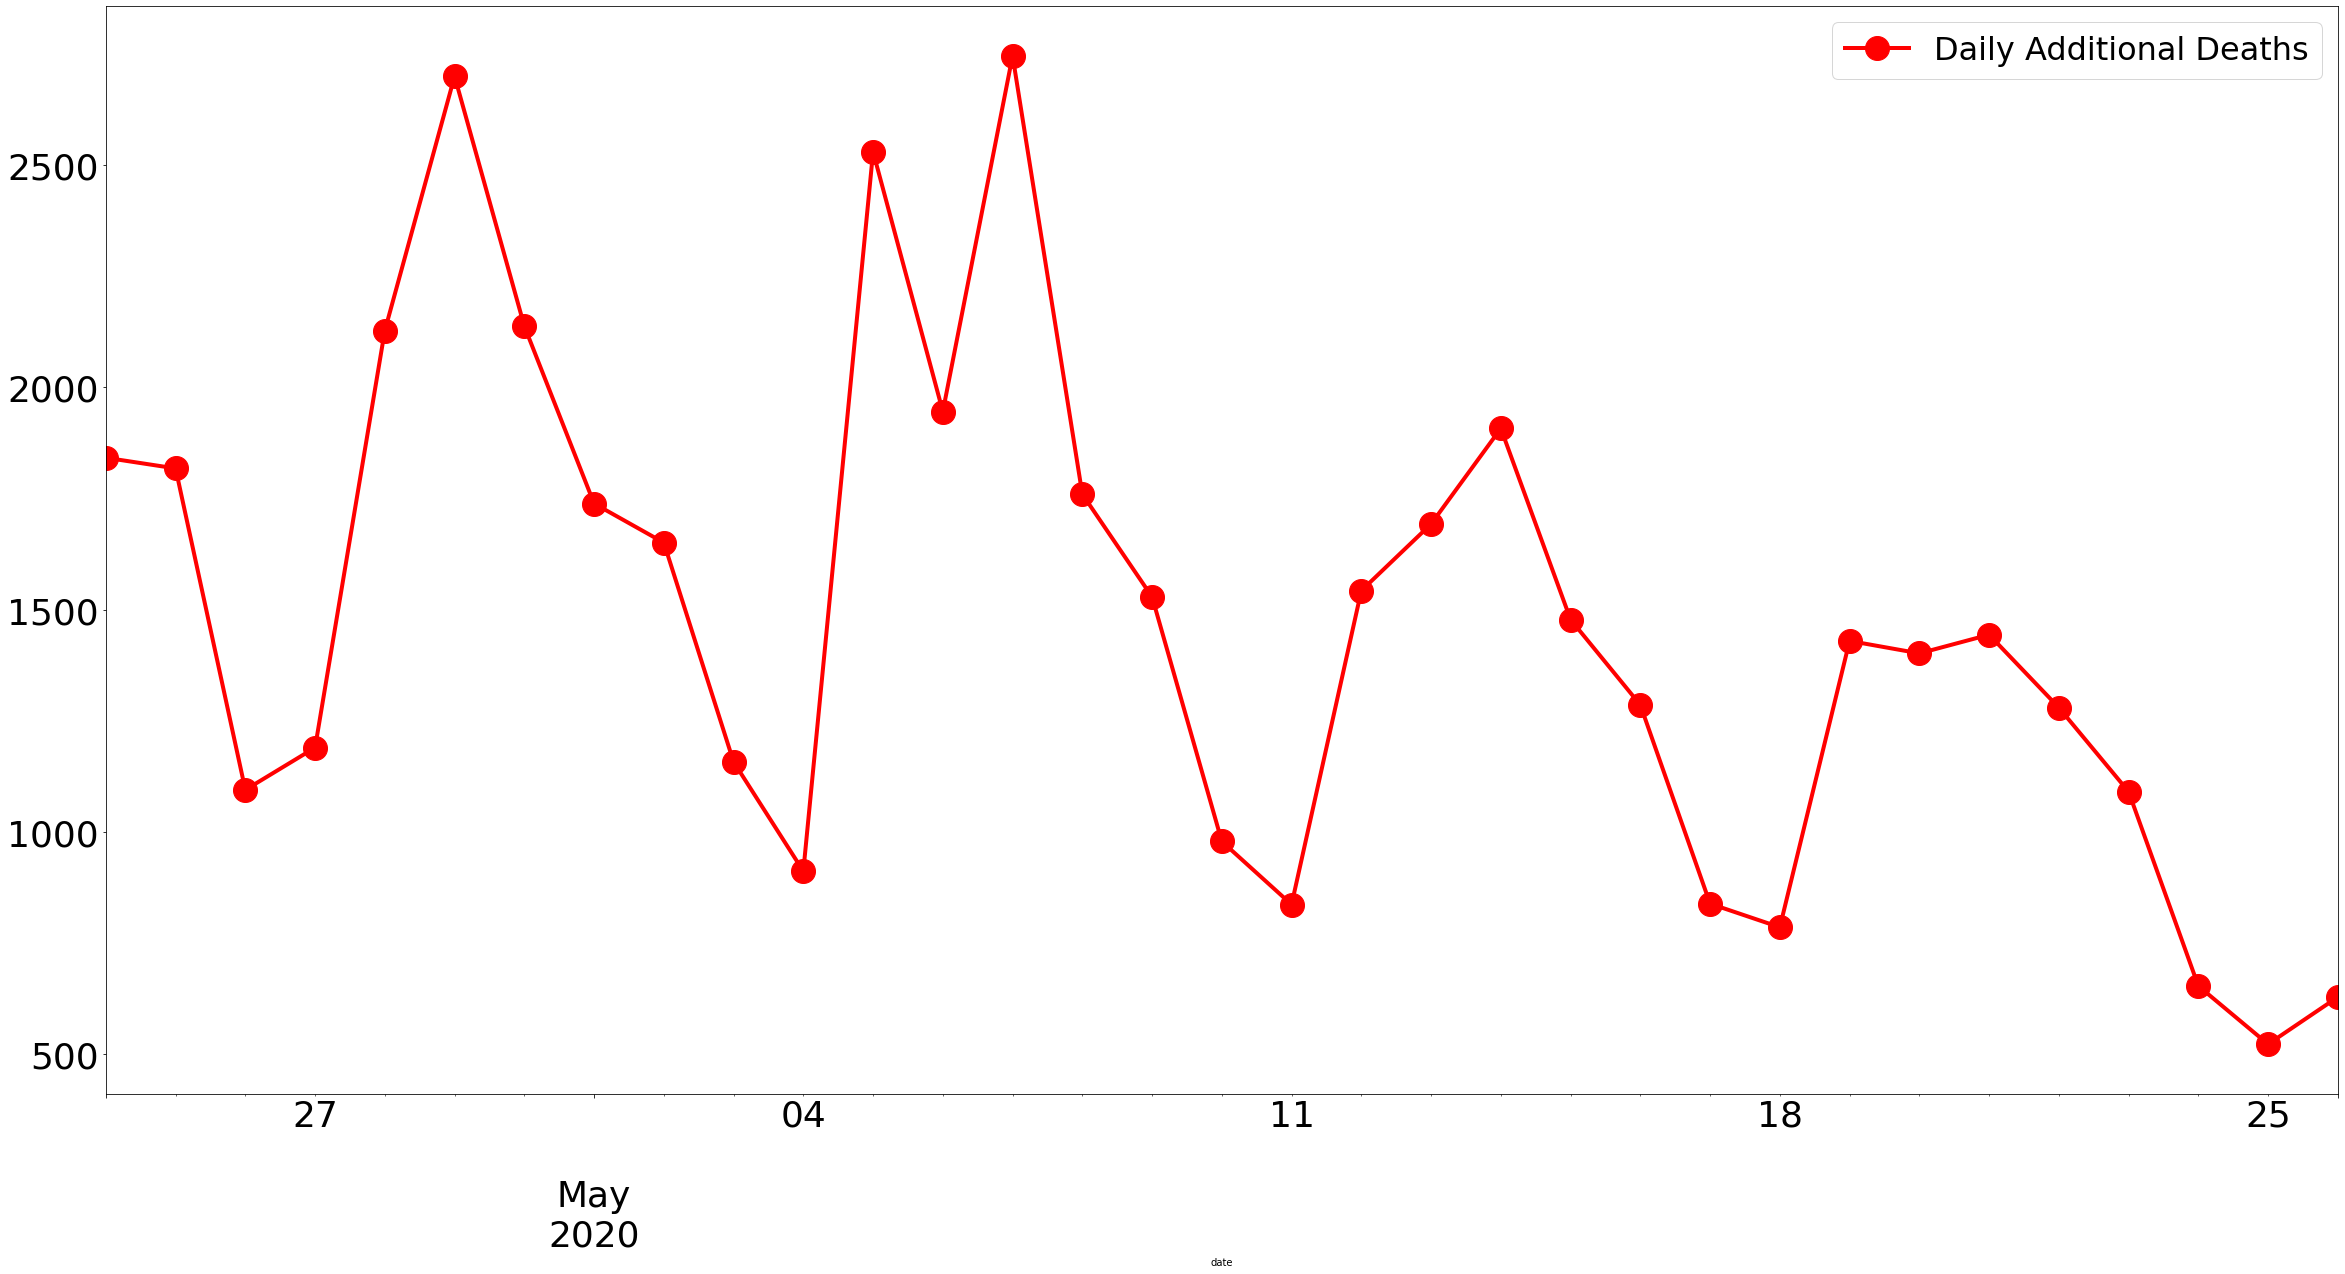

In [26]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


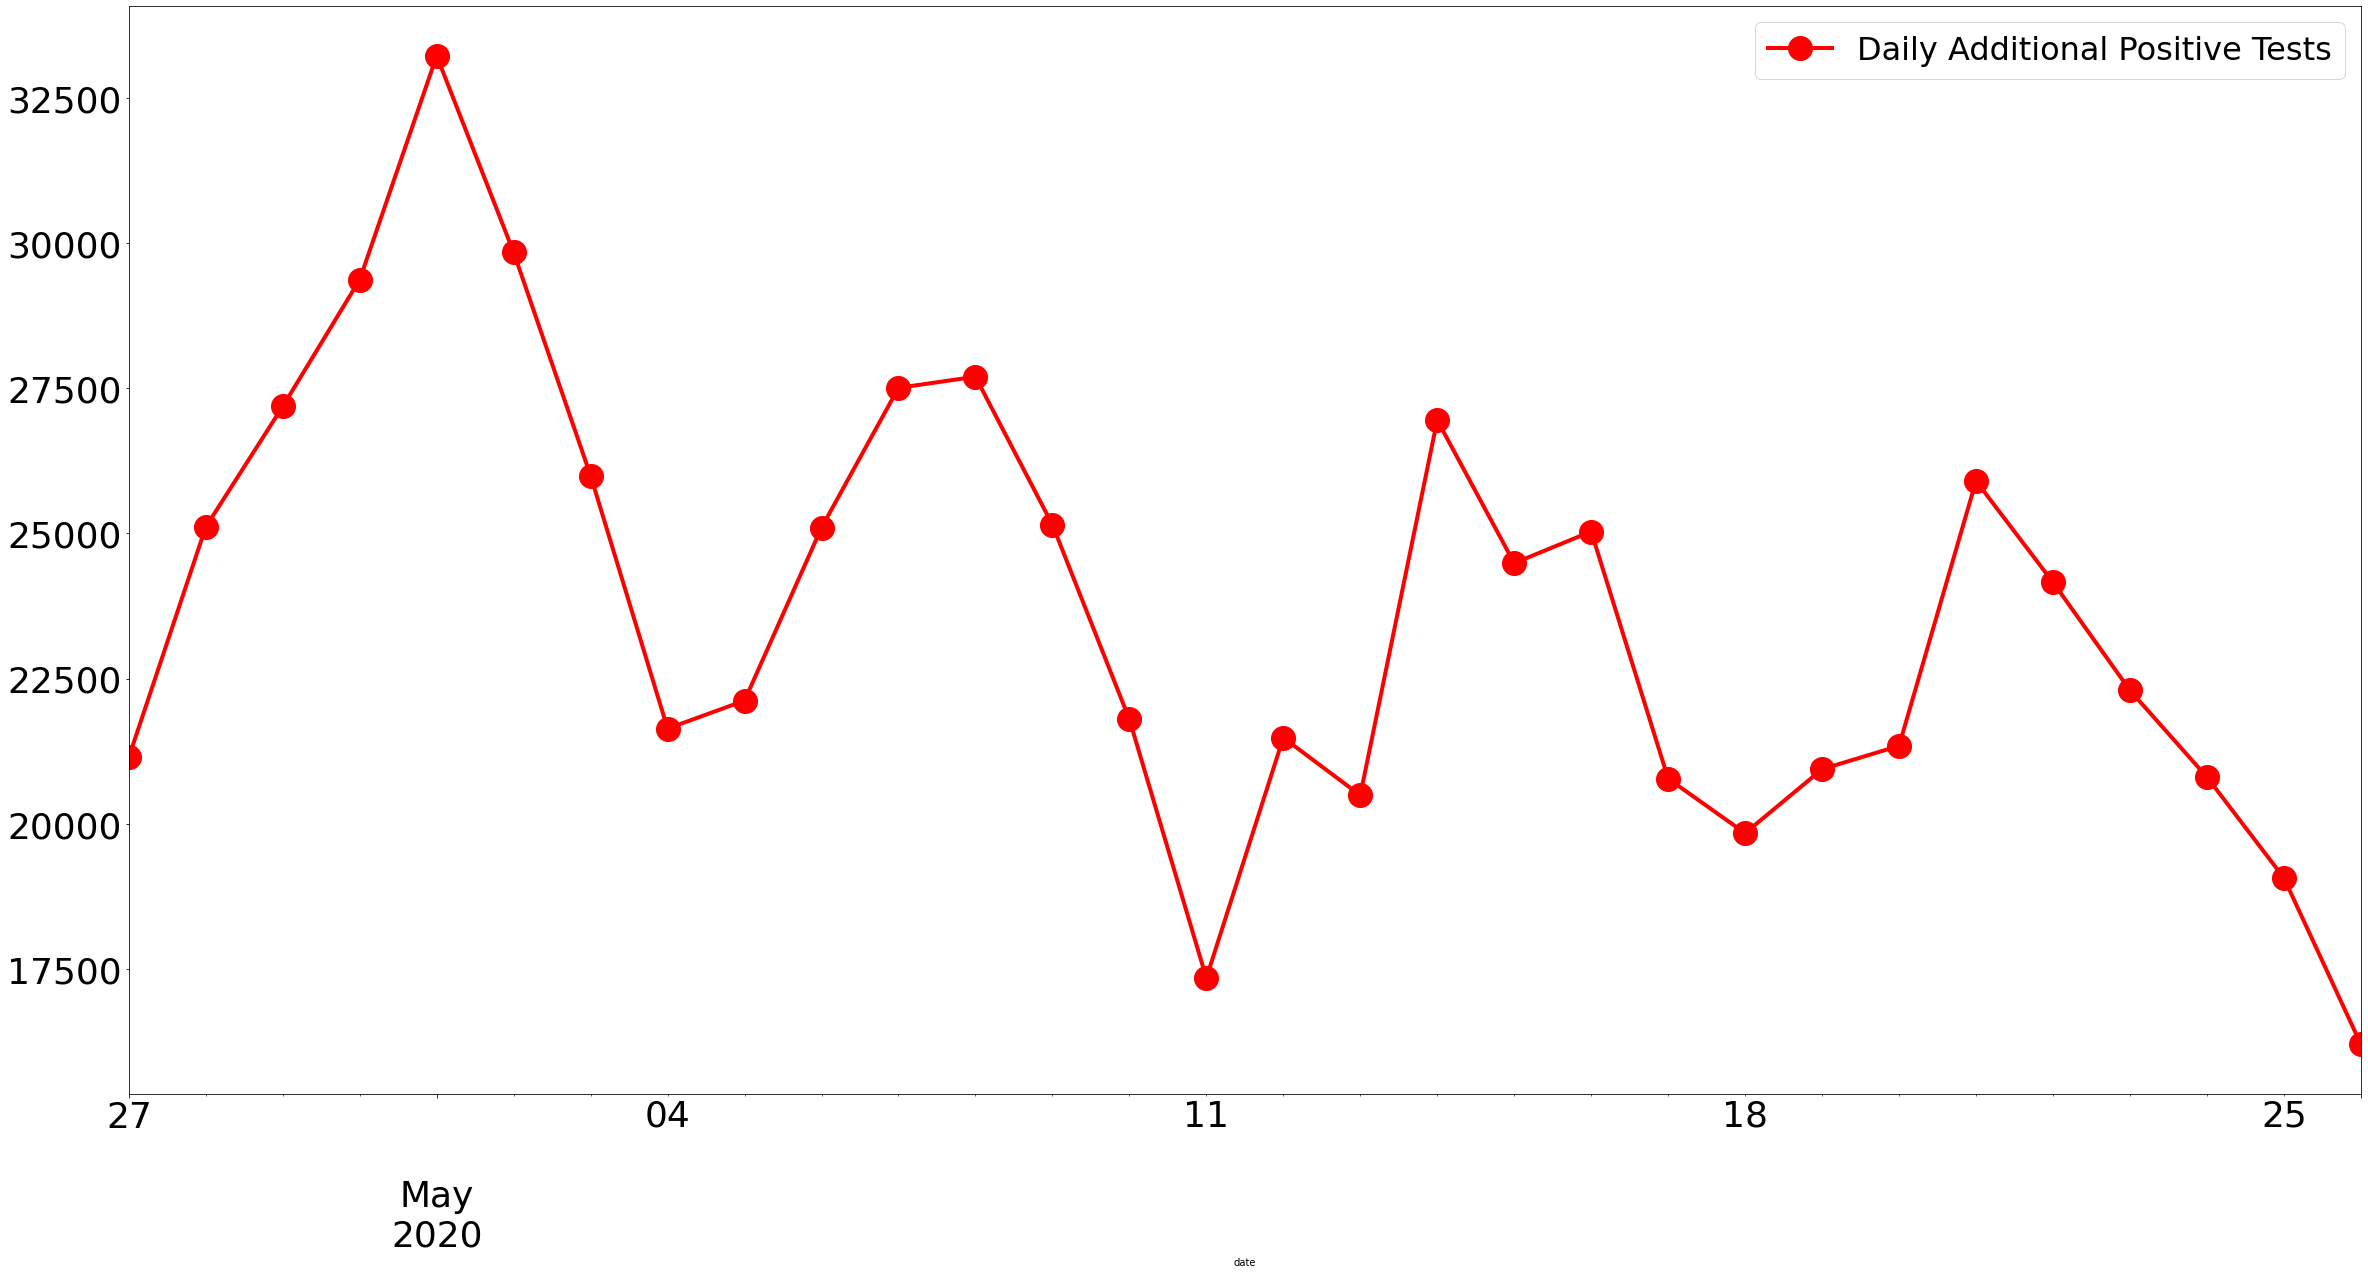

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()

chart = y1[-30:].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


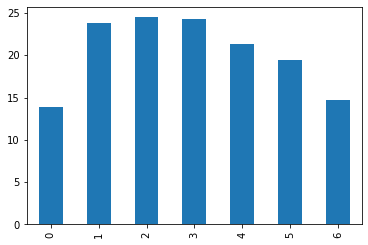

In [30]:
dfDoW.mean().deathIncrease.plot.bar()



In [31]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202016,14063.0,21844.0,844332.0,199843.0,1044175.0
202017,12864.0,18239.0,1319356.0,209064.0,1528420.0
202018,12704.0,24854.0,1462961.0,191865.0,1654826.0
202019,12402.0,18984.0,1747407.0,171010.0,1909104.0
202020,9584.0,12125.0,2324282.0,156568.0,2480850.0
202021,8087.0,15669.0,2548088.0,155287.0,2703375.0
202022,1152.0,18249.0,708072.0,35275.0,743347.0


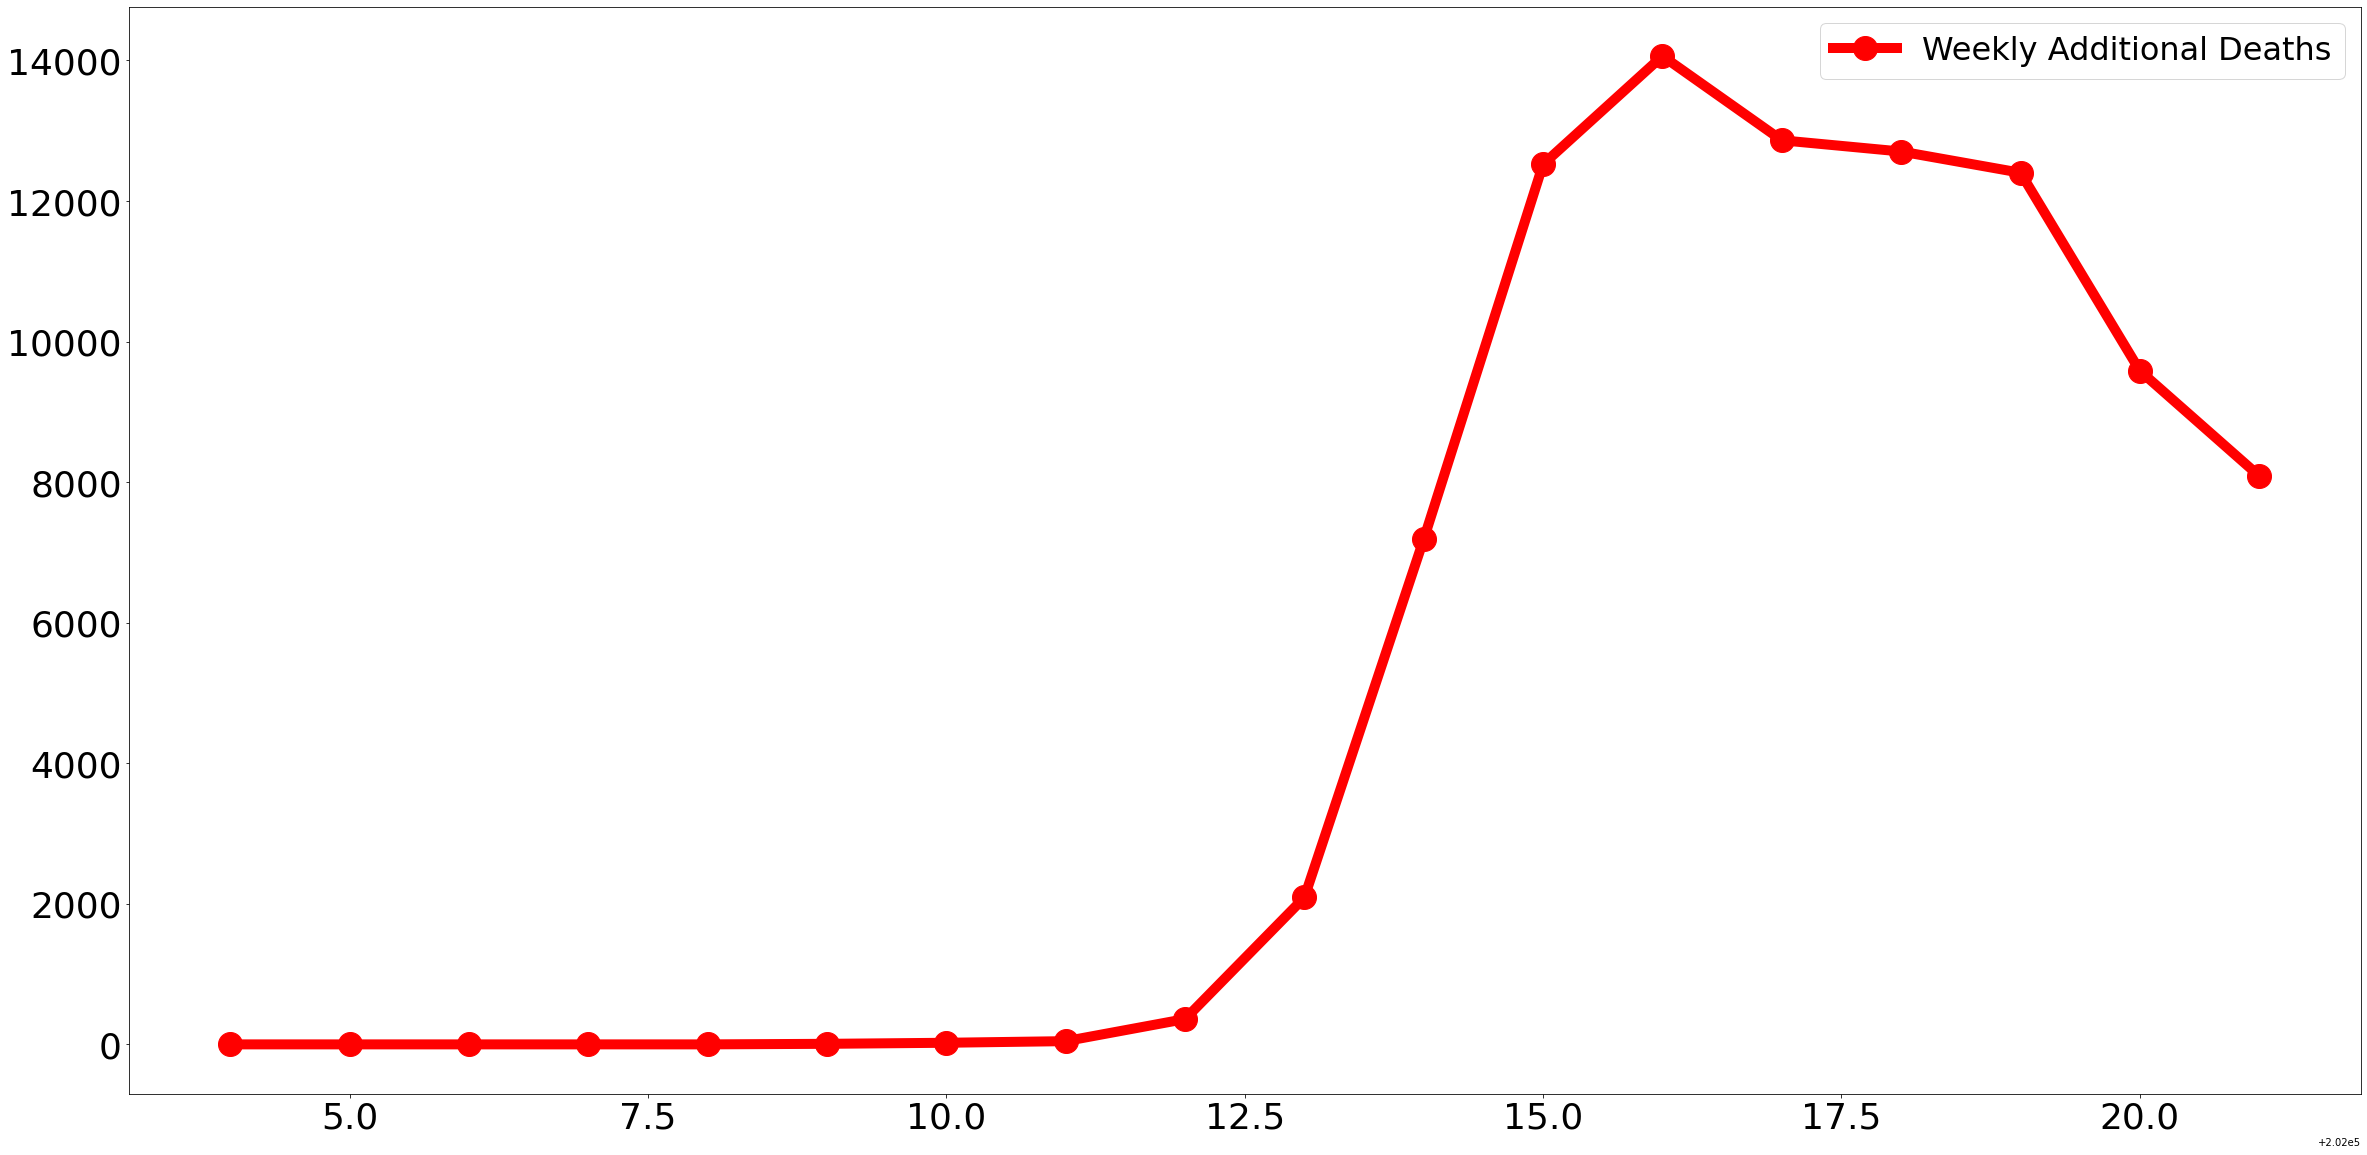

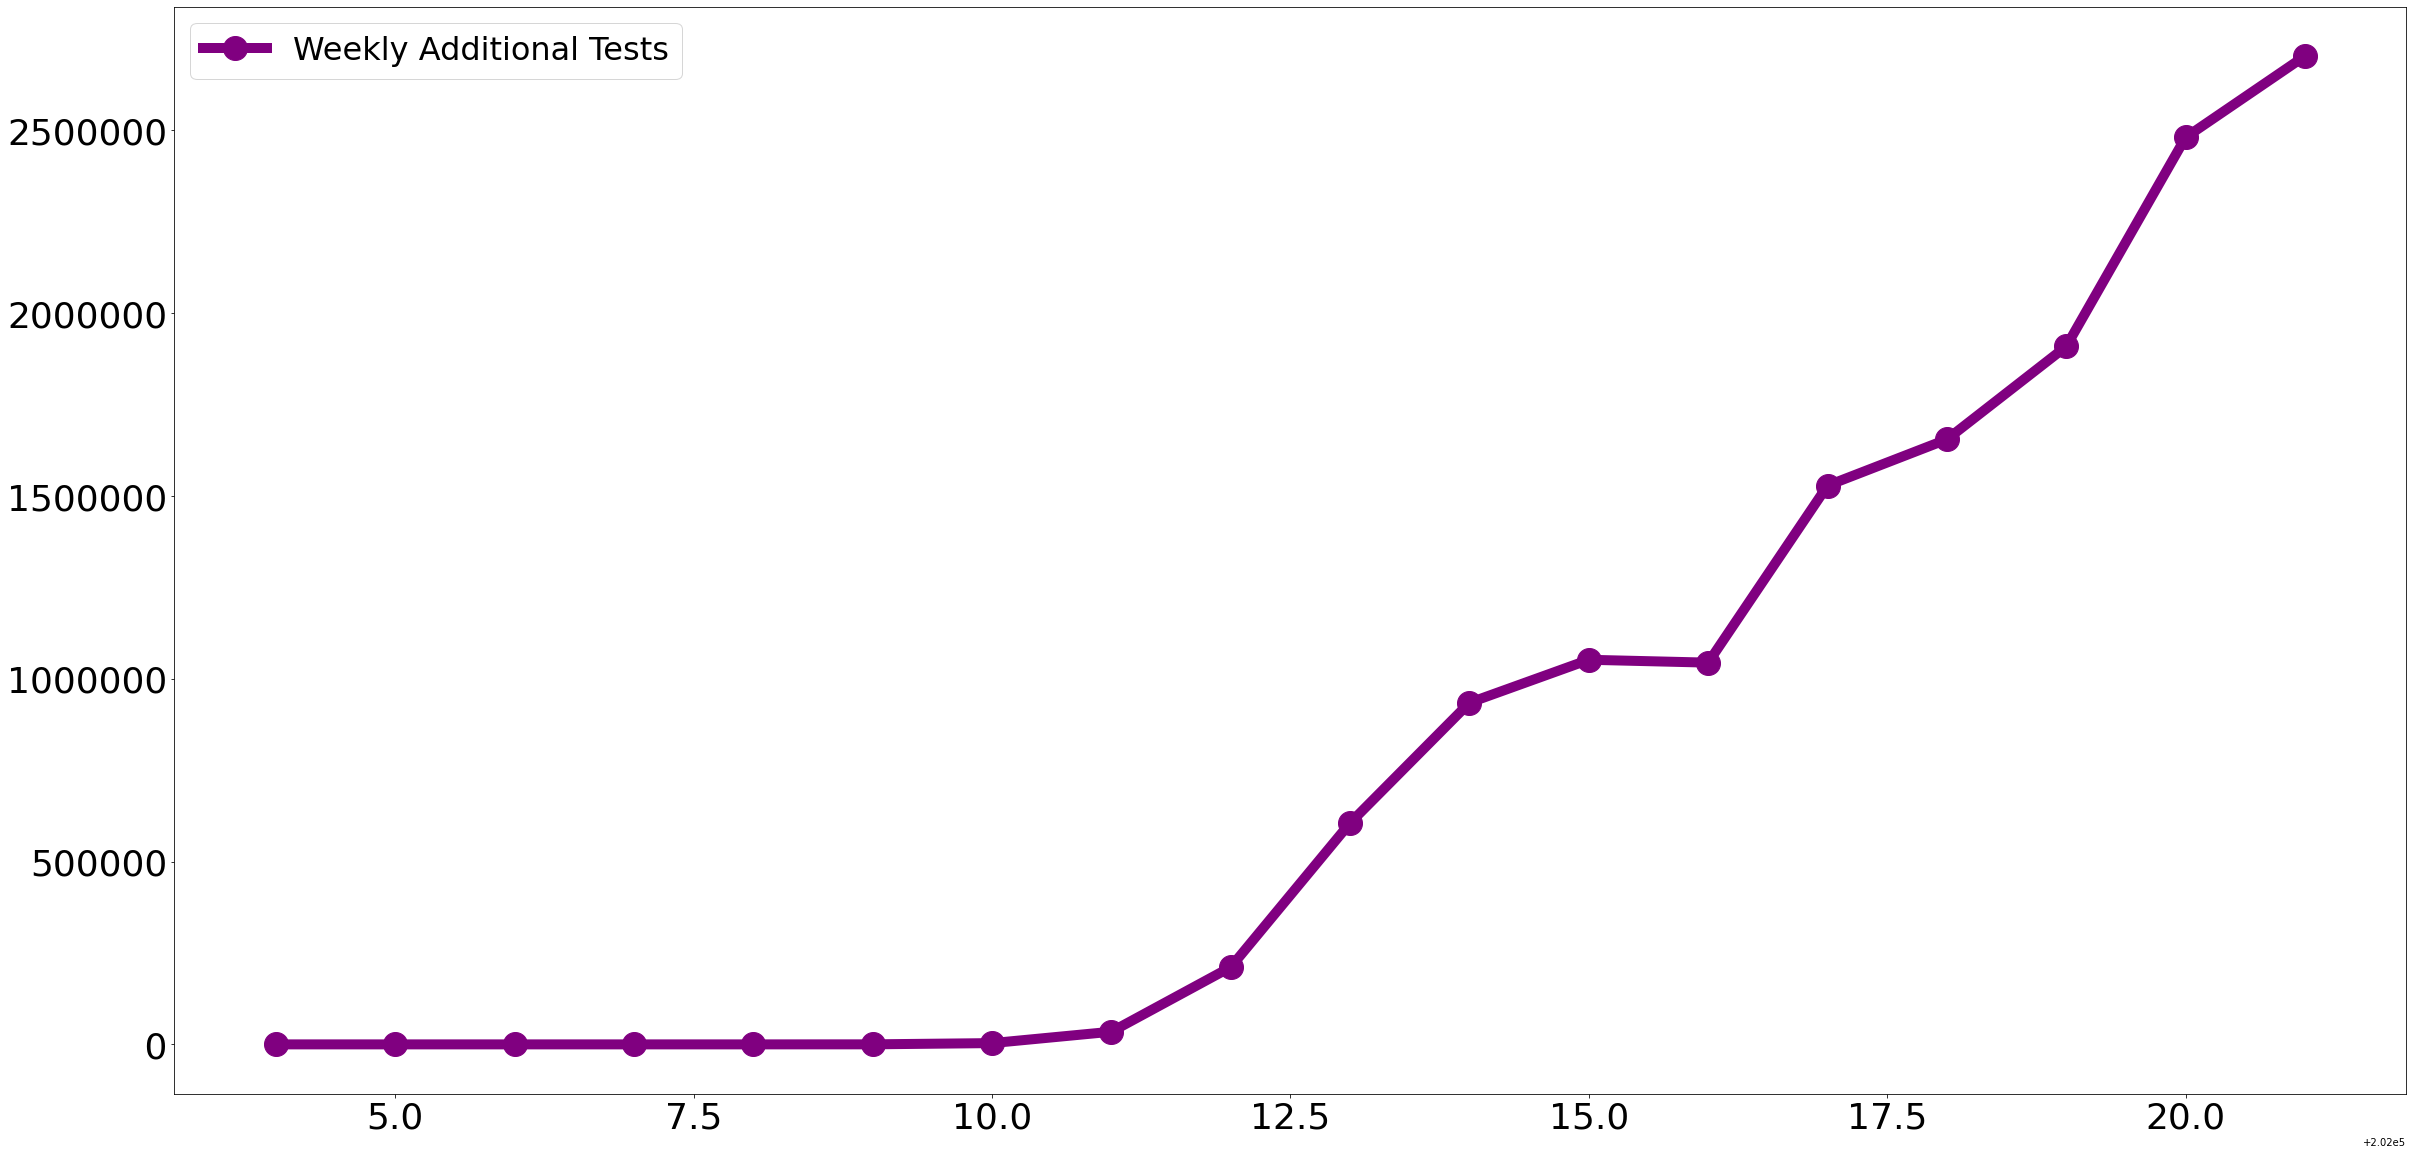

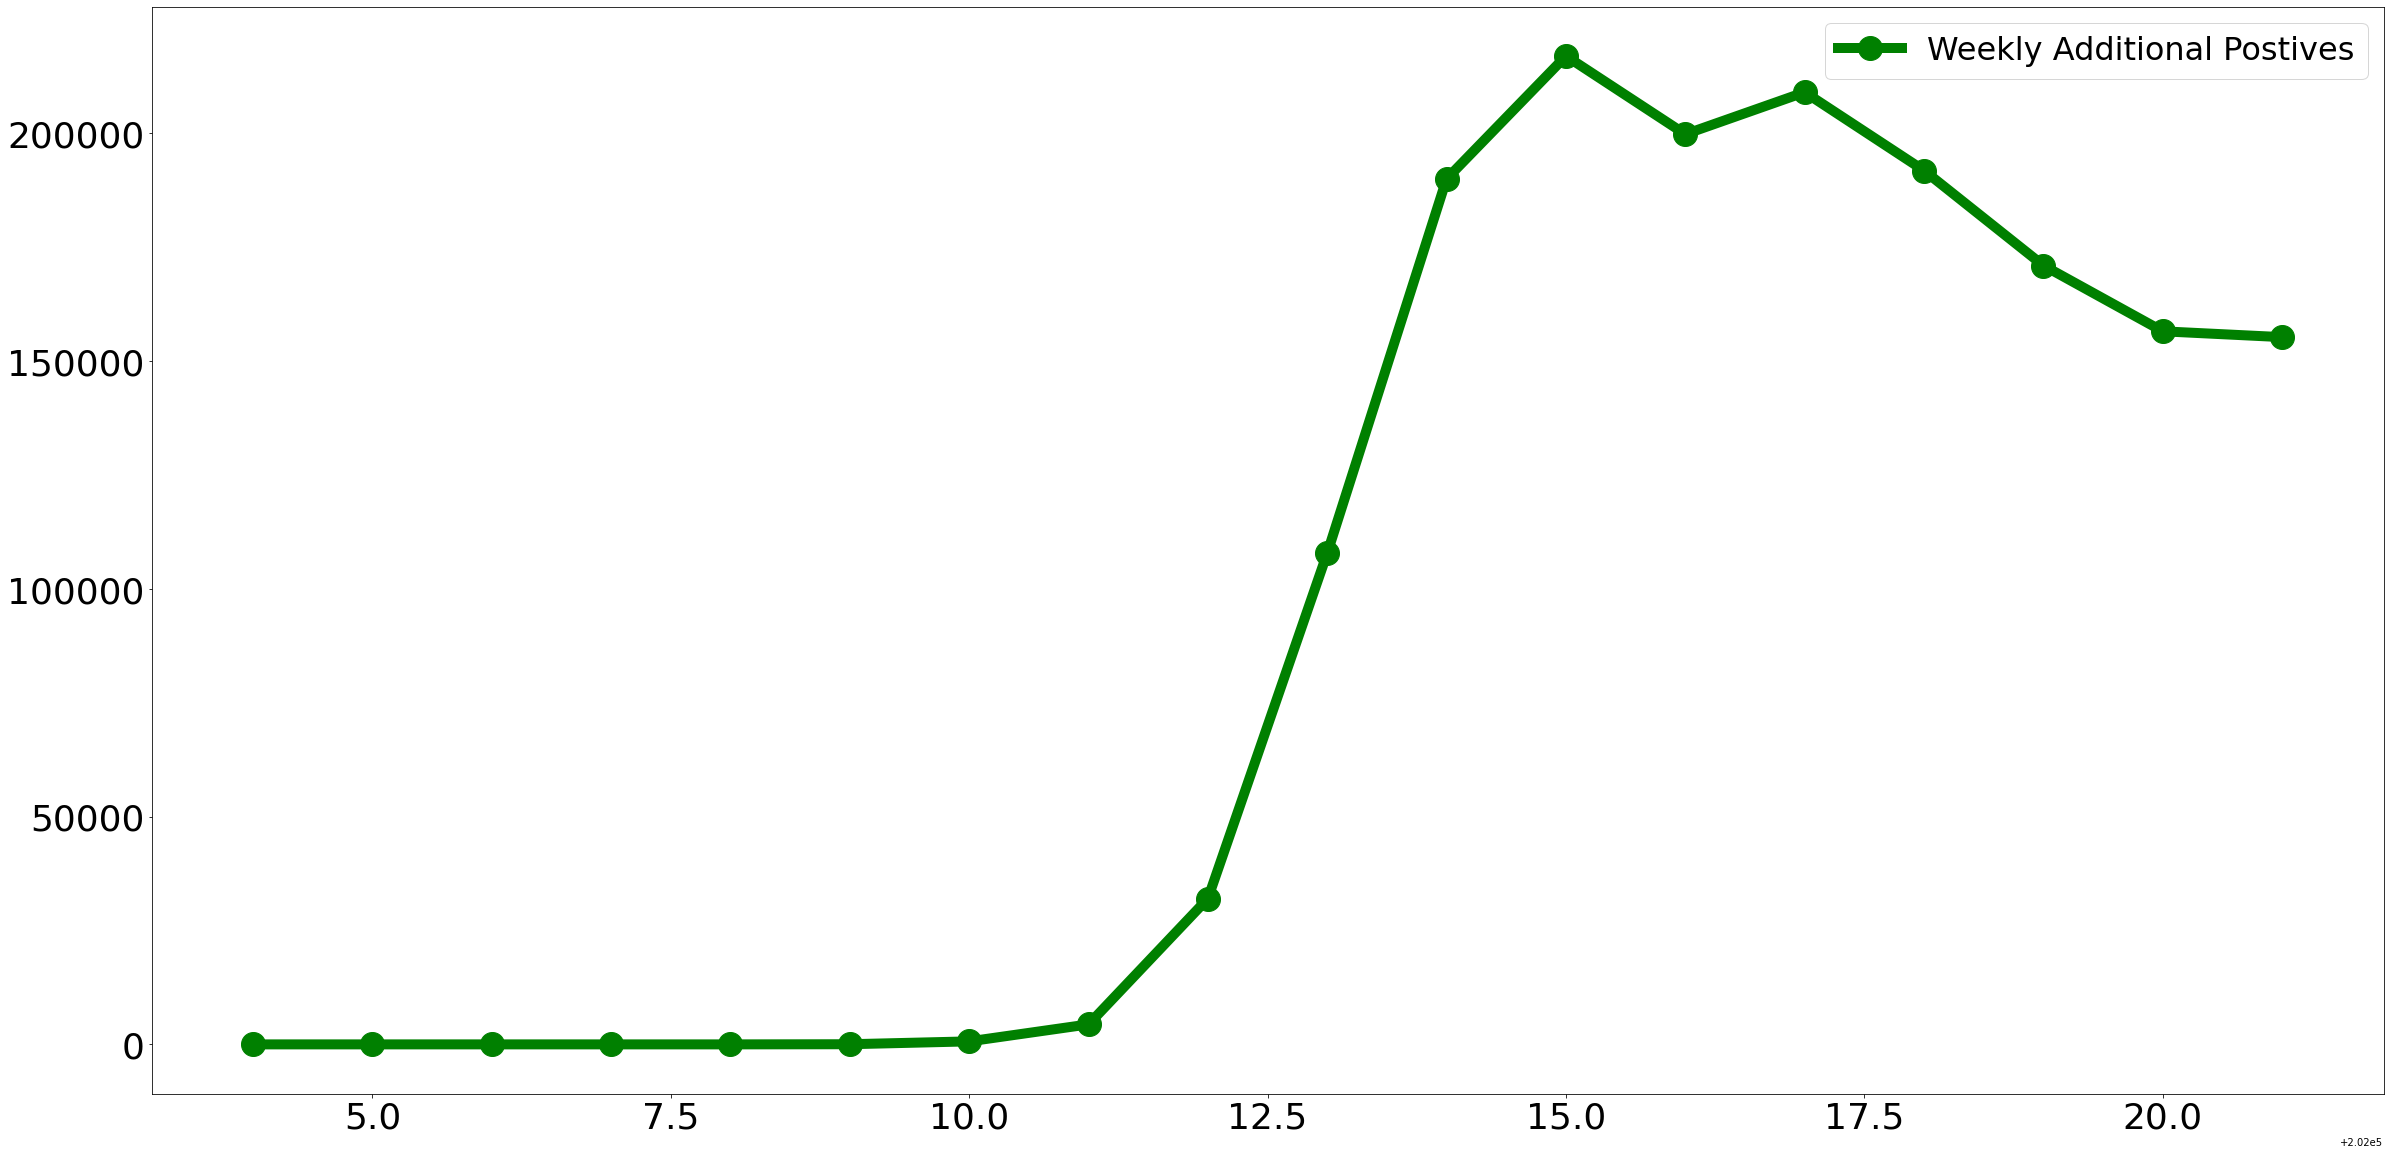

In [32]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

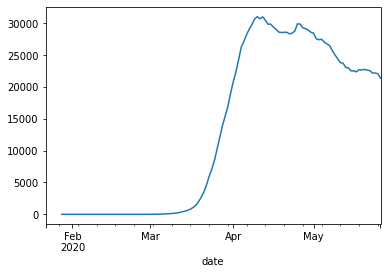

In [33]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

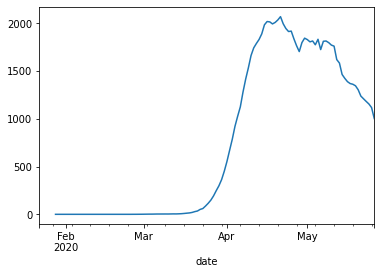

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

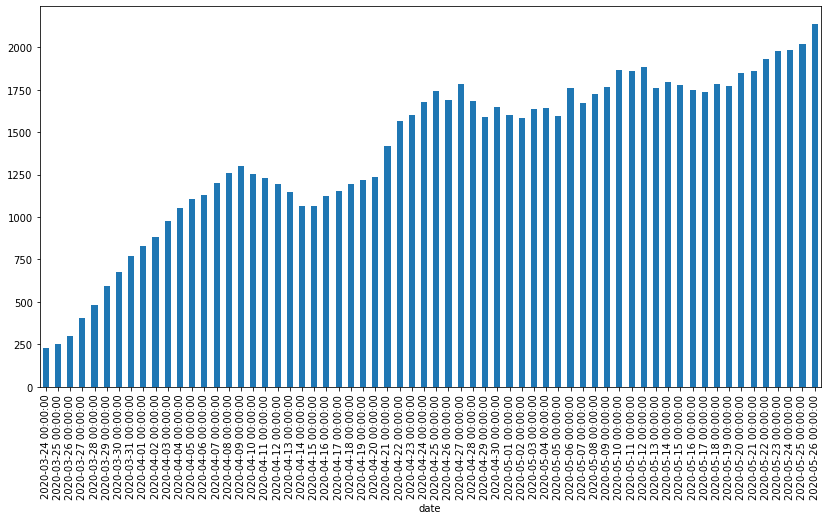

In [36]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


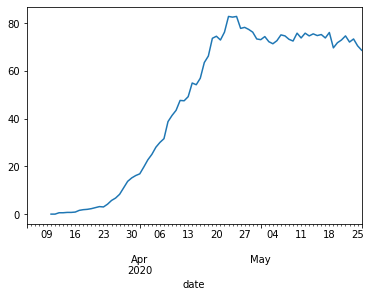

In [37]:
dfCAAvg.deathIncrease.plot.line()

In [38]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['AL']))].head(10)

,state,date,positive,death,total_positive,pct
82,AL,2020-05-26,15396,575,15396,1.000000
83,AL,2020-05-25,14730,562,15396,0.956742
84,AL,2020-05-24,14327,551,15396,0.930566
85,AL,2020-05-23,13938,546,15396,0.905300
86,AL,2020-05-22,13563,537,15396,0.880943
87,AL,2020-05-21,13119,529,15396,0.852104
88,AL,2020-05-20,12744,517,15396,0.827747
89,AL,2020-05-19,12376,504,15396,0.803845
90,AL,2020-05-18,12086,489,15396,0.785009
91,AL,2020-05-17,11771,488,15396,0.764549


In [39]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct


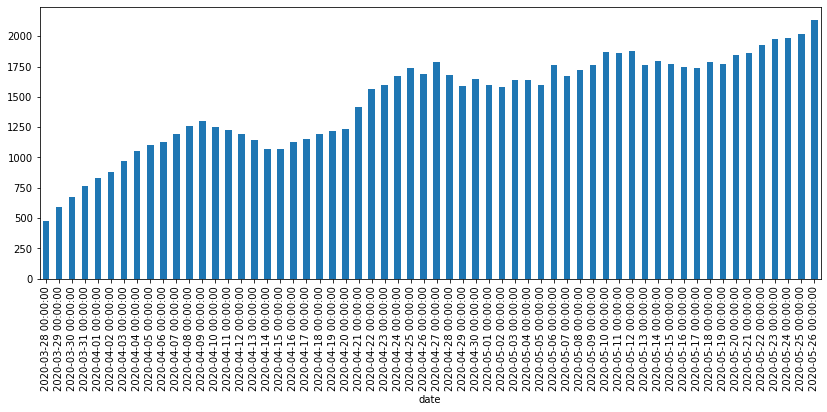

In [40]:

def showStateData(state):
  return dfCovidtracking[dfCovidtracking.state==state]\
  .sort_index()\
  .copy()



chart = showStateData('CA')\
.positiveIncrease\
.rolling(window=7)\
.mean()[-60:].plot.bar(figsize=(14,5))

In [41]:
dfTest = dfCovidtracking[dfCovidtracking.state=='CA'].sort_index().copy()
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


In [42]:
dfTest.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-04,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4a075d5c57bdb3c2b68cdc0024a0f5c14b77cb67,2020-03-04T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-05,CA,53,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,29660d4104d8a82ef4d69e5359cc586629d587ef,2020-03-05T21:00:00Z,0,0.0,515,515,515,06,0.0,0.0,0.0,0.0,0.0
2020-03-06,CA,60,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0bb79dc4f15a1eb8575ec0ca84b4e6b1f801756f,2020-03-06T21:00:00Z,0,0.0,522,522,522,06,0.0,0.0,0.0,7.0,7.0
2020-03-07,CA,69,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,e233a4c19e477fd4f7bcf450c3a73790f87a5680,2020-03-07T21:00:00Z,0,0.0,531,531,531,06,0.0,0.0,0.0,9.0,9.0
2020-03-08,CA,88,462,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,a34b3bacf8a39873680d04e62a718fc240a6ab06,2020-03-08T20:00:00Z,0,0.0,550,550,550,06,0.0,0.0,0.0,19.0,19.0


# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [45]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.index.max()][['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1671035
negative    13236006
pending         1549
death          93093
total       14908590
dtype: int64
Current Infection Rate 11.208538%
Percentage of US affected: 0.537451%
Observed CFR: 5.570978%
Percentage of US tested/affected: 4.569874%
Projected affected by cir = 36,790,853
Projected killed = 2,049,611


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.index.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [53]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.870280,9.119811
NJ,1.753667,7.159180
MA,1.359347,7.914121
RI,1.341375,12.777797
DC,1.180873,5.958917
CT,1.158476,6.321006
DE,0.931026,5.639354
IL,0.893281,6.209005
LA,0.818578,7.335795


In [54]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 4.541513%


In [55]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [57]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19918 entries, 0 to 19917
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         19854 non-null  object 
 1   location                         19918 non-null  object 
 2   date                             19918 non-null  object 
 3   total_cases                      19918 non-null  int64  
 4   new_cases                        19918 non-null  int64  
 5   total_deaths                     19918 non-null  int64  
 6   new_deaths                       19918 non-null  int64  
 7   total_cases_per_million          19541 non-null  float64
 8   new_cases_per_million            19541 non-null  float64
 9   total_deaths_per_million         19541 non-null  float64
 10  new_deaths_per_million           19541 non-null  float64
 11  total_tests                      5287 non-null   float64
 12  new_tests         

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [60]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    14163694.0
RUS     8945384.0
ITA     3482253.0
DEU     3147771.0
IND     3033591.0
          ...    
MMR       19552.0
MDV       18483.0
CRI       16349.0
ZWE       15555.0
BOL       12349.0
Name: total_tests, Length: 85, dtype: float64

In [61]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 46461121
Total tests done in USA : 14163694
How many more times has the world tested more than the US: 3.3


In [62]:
dfOwidLatest[isUSA].sum()

location                                                         United States
date                                                                2020-05-24
total_cases                                                            1622670
new_cases                                                                21236
total_deaths                                                             97087
new_deaths                                                                1080
total_cases_per_million                                                4902.29
new_cases_per_million                                                   64.157
total_deaths_per_million                                               293.312
new_deaths_per_million                                                   3.263
total_tests                                                        1.41637e+07
new_tests                                                               378908
total_tests_per_thousand                            

In [63]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-20,19970,1568
2020-05-21,23285,1518
2020-05-22,25434,1263
2020-05-23,24147,1305
2020-05-24,21236,1080
2020-05-25,20568,633
2020-05-26,19064,500


In [0]:
state = 'AL'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state]\
.rolling(window=7).mean()


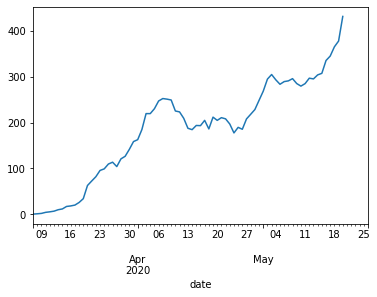

In [86]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [66]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

52255

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'][['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [68]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,286.0,895.0,71079.0,5183.0,76262.0
1,438.0,1516.0,63965.0,7529.0,71494.0
2,314.0,1647.0,55933.0,7257.0,63190.0
3,270.0,1029.0,48070.0,5816.0,53886.0
4,297.0,1139.0,76234.0,7598.0,83832.0
5,174.0,1026.0,77174.0,5350.0,82524.0
6,92.0,295.0,78760.0,4995.0,83755.0


# Socrata (San Francisco) Data

In [69]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")
results_df = pd.DataFrame.from_records(client.get("tvq9-ec9w"))

In [72]:
results_df.case_disposition.unique()

array(['Confirmed', 'Death'], dtype=object)

In [0]:
res = results_df.astype({'case_count':'int16'})

In [0]:
dfresConf = res[res.case_disposition=='Confirmed']
dfresDead = res[res.case_disposition=='Death']

In [75]:
dfresDead.groupby('date').sum().tail(5)

,case_count
date,
2020-05-08T00:00:00.000,1
2020-05-09T00:00:00.000,2
2020-05-12T00:00:00.000,1
2020-05-15T00:00:00.000,1
2020-05-17T00:00:00.000,1


In [76]:
dfresConf.groupby('date').sum().rename(columns={'case_count':'new_cases'}).tail()

,new_cases
date,
2020-05-20T00:00:00.000,33
2020-05-21T00:00:00.000,43
2020-05-22T00:00:00.000,22
2020-05-23T00:00:00.000,21
2020-05-24T00:00:00.000,8


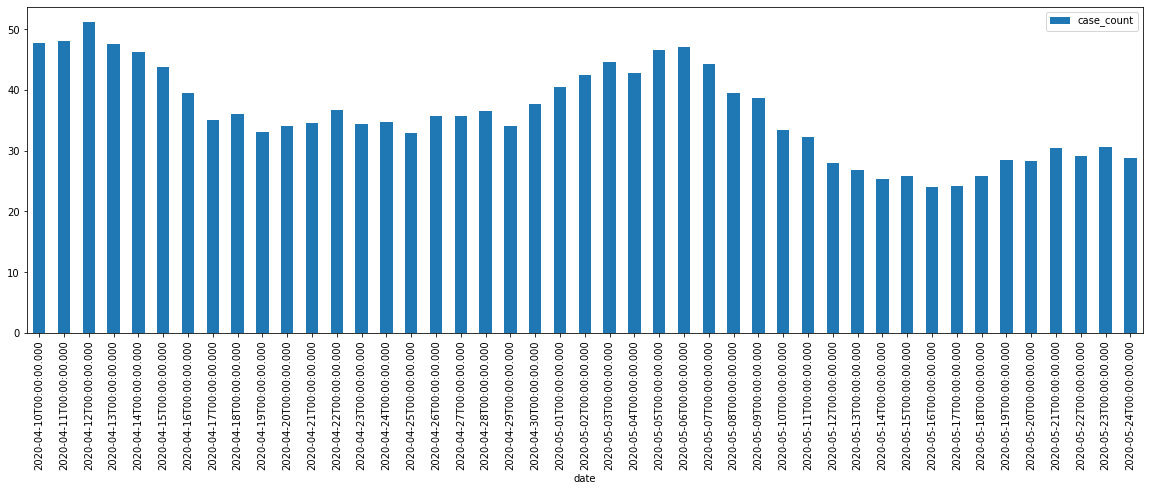

In [77]:
dfresConf.groupby('date').sum().rolling(window=7).mean()[-45:].plot.bar(figsize=(20,6))

# Marin Data

In [0]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRmO2pStf7Ft1yYjDULluZXzUAczGK_B34hDemDBadGEY0HTLwlcadF2cHNEwmmvLetUTf-D2ruYCT/pub?gid=0&single=true&output=csv"

df = pd.read_csv(url, header=1, parse_dates=[0], usecols=[0,1,3,5,6,7], index_col=[0])

In [79]:
df.tail()

,positive,deaths,tested,hospitalizations,Recovered
date,,,,,
2020-05-22,369,14.0,10694.0,50.0,251.0
2020-05-23,388,14.0,11023.0,51.0,253.0
2020-05-24,403,14.0,11307.0,51.0,255.0
2020-05-25,417,14.0,11587.0,51.0,262.0
2020-05-26,420,14.0,11796.0,52.0,269.0


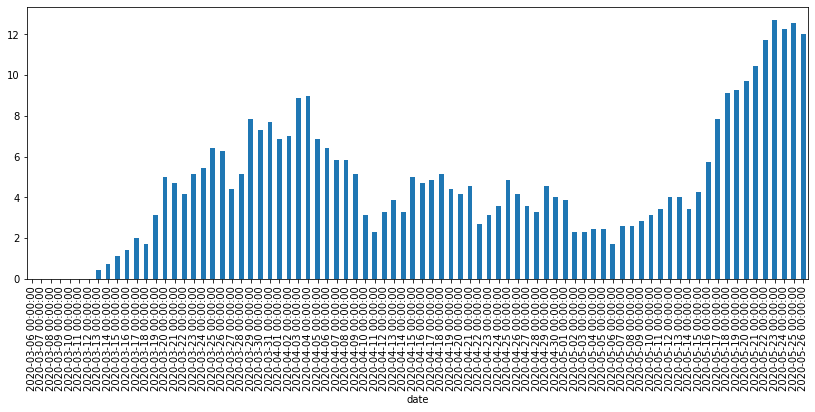

In [80]:
chart= df.positive.diff().rolling(window=7).mean().plot.bar(figsize=(14,5))

In [81]:
marin_pop = 259725

print(f"Marin Population Positive: {(df[-1:].positive.values[0]/marin_pop)*100:2.2f}%")
print(f"Marin Population Tested: {(df[-1:].tested.values[0]/marin_pop)*100:2.2f}%")

Marin Population Positive: 0.16%
Marin Population Tested: 4.54%


In [82]:
df.positive.diff().rolling(window=7).mean().tail()

date
2020-05-22    11.714286
2020-05-23    12.714286
2020-05-24    12.285714
2020-05-25    12.571429
2020-05-26    12.000000
Name: positive, dtype: float64

In [95]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(14)[::-1].positive.diff()


date
2020-05-13       NaN
2020-05-14    2023.0
2020-05-15    1772.0
2020-05-16    1857.0
2020-05-17    2046.0
2020-05-18    1591.0
2020-05-19    1365.0
2020-05-20    2262.0
2020-05-21    2140.0
2020-05-22    2247.0
2020-05-23    2187.0
2020-05-24    2079.0
2020-05-25    1848.0
2020-05-26    2175.0
Name: positive, dtype: float64